# Benchmark 1

- Models score when the shuffle param in train_test_split is True.
    - Train set: 80% of the entire dataset
    - Test set: 20% of the entire dataset

### Model seletction results

This plot is about the models score generated with model_selection.py where the hyperparams are adjusted to optimize the results of each model.

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy import std

# Dataset as a dataframe.
df = pd.read_csv('/Users/jarmireciomartinez/Workshop_AI/B1/df_results.csv', sep=",")
df = df[['Name','MAE_test']]

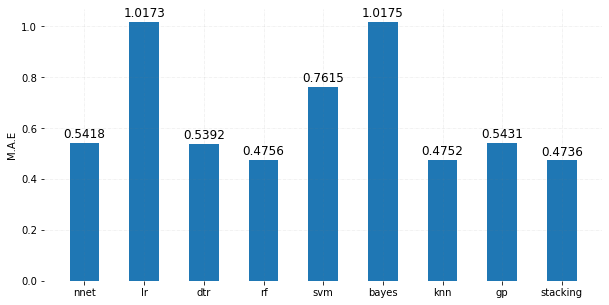

In [18]:
name = df['Name'].tolist()
score = df['MAE_test'].tolist()

# Figure Size 
fig, ax = plt.subplots(figsize = (10,5)) 
  
# Bar Plot 
ax.bar(name, score, 0.5)   

for i, v in enumerate(score):
    ax.text(i-0.35, v+0.02,round(score[i],4), fontsize=12)

# Remove the axes
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False)

# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2)

ax.set_ylabel('M.A.E')
  
# Show Plot 
plt.savefig('B1.pdf')

### Final test plots

The next plots shown the execution of final_test.py for each model, where it can be seen the predictions and the error generated.

In [101]:
# Dataset as a dataframe.
df_stacking_gp = pd.read_csv('/Users/jarmireciomartinez/Workshop_AI/B1/df_final_test_stacking.csv', sep=",")
df_stacking_gp = df_stacking_gp[['y_test','y_pred','reg_error']]

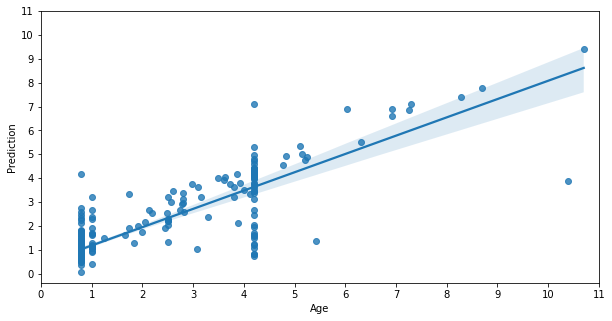

In [102]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (10,5))
sns.regplot(x="y_test", y="y_pred", data=df_stacking_gp)

plt.yticks(np.arange(0, 12, 1))
plt.xticks(np.arange(0, 12, 1))
plt.xlabel("Age")
plt.ylabel("Prediction")

plt.savefig('B1_stacking_1.pdf')

### Ages histogram (train and test)

In [103]:
# Train and test datasets as one dataframe.
df_data = pd.read_csv('/Users/jarmireciomartinez/Workshop_AI/B1/df_data.csv', sep=",")
df_data = df_data[['X_train','y_train','X_test','y_test']]

/Users/jarmireciomartinez/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jarmireciomartinez/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


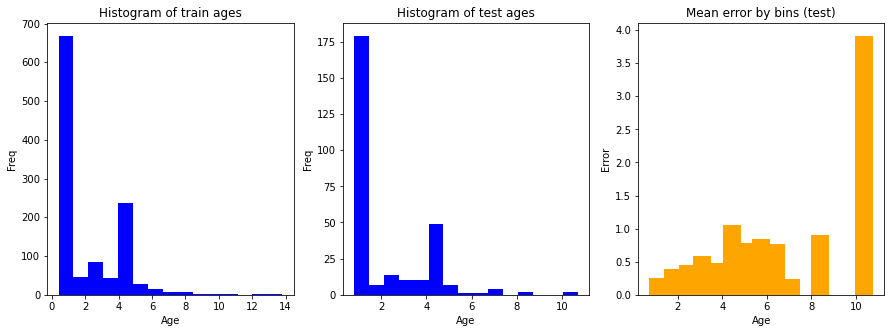

In [104]:
num_bins = 15

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))

n1, bins1, patches1 = ax1.hist(df_data['y_train'], num_bins, density=False, color='blue')
n2, bins2, patches2 = ax2.hist(df_data['y_test'], num_bins, density=False, color='blue')

# calculate mean error for each bin
aux = []
mean_error = []
for i in range(len(bins2)-1):
    if (i ==14):
        mean_err = (abs(df_stacking_gp[(df_stacking_gp['y_test'] >= bins2[i])
                                    & (df_stacking_gp['y_test']<= bins2[i+1])].reg_error)).mean()
        mean_error.append(mean_err)
        aux_2 = (bins2[i]+bins2[i+1])/2
        aux.append(aux_2)
        
    else:
        mean_err = (abs(df_stacking_gp[(df_stacking_gp['y_test'] >= bins2[i])
                                    & (df_stacking_gp['y_test']< bins2[i+1])].reg_error)).mean()
        mean_error.append(mean_err)
        aux_2 = (bins2[i]+bins2[i+1])/2
        aux.append(aux_2)

ax3.bar(aux,mean_error,color='orange')


ax1.set_title('Histogram of train ages')
ax2.set_title('Histogram of test ages')
ax3.set_title('Mean error by bins (test)')
ax1.set_xlabel('Age')
ax2.set_xlabel('Age')
ax3.set_xlabel('Age')
ax1.set_ylabel('Freq')
ax2.set_ylabel('Freq')
ax3.set_ylabel('Error')

plt.savefig('B1_stacking_2.pdf')

In [79]:
# Next df shows the mean error for each bin

df_bins_error = pd.DataFrame({'Bin': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
                            'Mean Error': mean_error})
df_bins_error

,Bin,Mean Error
0,1,0.211167
1,2,0.383709
2,3,0.543812
3,4,0.914521
4,5,0.577961
5,6,0.960963
6,7,0.927987
7,8,0.038621
8,9,0.432130
9,10,0.999266


# Benchmark 2.1

- Models score when the shuffle param in train_test_split is False.
    - Train set: 70% of the entire dataset (To 3.03)
    - Test set: 30% of the entire dataset (From 3.04)
- Age histogram to compare train and test datasets (with mean error by bin in the test set).

### Model Selection Results without shuffle

In [114]:
# Dataset as a dataframe.
df_nosh = pd.read_csv('/Users/jarmireciomartinez/Workshop_AI/B2/G1/df_results.csv', sep=",")
df_nosh = df_nosh[['Name','MAE_test']]

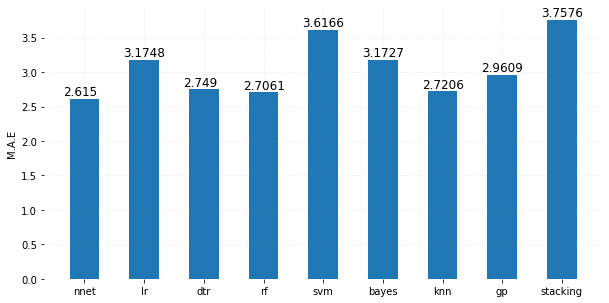

In [115]:
name = df_nosh['Name'].tolist()
score = df_nosh['MAE_test'].tolist()

# Figure Size 
fig, ax = plt.subplots(figsize = (10,5)) 
  
# Bar Plot 
ax.bar(name, score, 0.5)   

for i, v in enumerate(score):
    ax.text(i-0.35, v+0.05,round(score[i],4), fontsize=12)

# Remove the axes
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False)

# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2)

ax.set_ylabel('M.A.E')
  
# Show Plot 
plt.savefig('B2_G1.pdf')
#plt.show()

### Final test plots 

In [196]:
# Dataset as a dataframe.
df_nnet_nosh_2 = pd.read_csv('/Users/jarmireciomartinez/Workshop_AI/B2/G1/df_final_test_stacking.csv', sep=",")
df_nnet_nosh_2 = df_nnet_nosh_2[['y_test','y_pred','reg_error']]

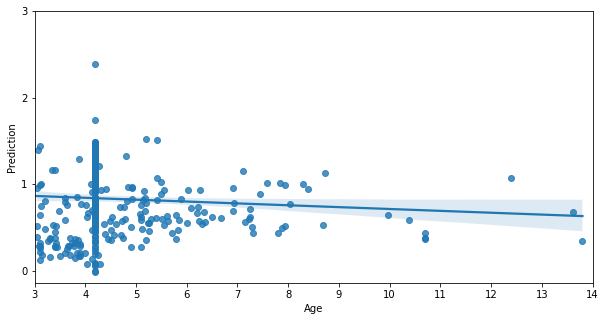

In [199]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (10,5))
sns.regplot(x="y_test", y="y_pred", data=df_nnet_nosh_2)

plt.yticks(np.arange(0, 4, 1))
plt.xticks(np.arange(3, 15, 1))
plt.xlabel("Age")
plt.ylabel("Prediction")

plt.savefig('B2_G1_stacking_1.pdf')

### Ages histogram (train and test, without shuffle)

In [200]:
# Train and test datasets as one dataframe.
df_data_nosh = pd.read_csv('/Users/jarmireciomartinez/Workshop_AI/B2/G1/df_data.csv', sep=",")
df_data_nosh = df_data_nosh[['X_train','y_train','X_test','y_test']]

/Users/jarmireciomartinez/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jarmireciomartinez/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


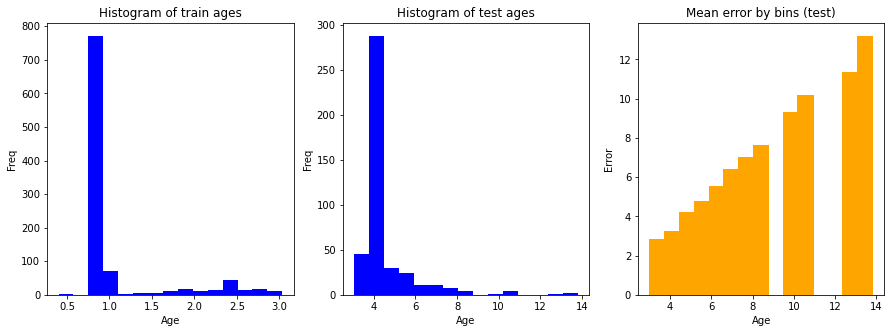

In [201]:
num_bins = 15

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))

n1, bins1, patches1 = ax1.hist(df_data_nosh['y_train'], num_bins, density=False, color='blue')
n2, bins2, patches2 = ax2.hist(df_data_nosh['y_test'], num_bins, density=False, color='blue')


# calculate mean error for each bin
aux = []
mean_error = []
for i in range(len(bins2)-1):
    if (i ==14):
        mean_err = (abs(df_nnet_nosh_2[(df_nnet_nosh_2['y_test'] >= bins2[i])
                                    & (df_nnet_nosh_2['y_test']<= bins2[i+1])].reg_error)).mean()
        mean_error.append(mean_err)
        aux_2 = (bins2[i]+bins2[i+1])/2
        aux.append(aux_2)
        
    else:
        mean_err = (abs(df_nnet_nosh_2[(df_nnet_nosh_2['y_test'] >= bins2[i])
                                    & (df_nnet_nosh_2['y_test']< bins2[i+1])].reg_error)).mean()
        mean_error.append(mean_err)
        aux_2 = (bins2[i]+bins2[i+1])/2
        aux.append(aux_2)

ax3.bar(aux,mean_error, color='orange')

ax1.set_title('Histogram of train ages')
ax2.set_title('Histogram of test ages')
ax3.set_title('Mean error by bins (test)')
ax1.set_xlabel('Age')
ax2.set_xlabel('Age')
ax3.set_xlabel('Age')
ax1.set_ylabel('Freq')
ax2.set_ylabel('Freq')
ax3.set_ylabel('Error')

plt.savefig('B2_G1_stacking_2.pdf')

In [129]:
# Next df shows the mean error for each bin

df_bins_error_no_sh = pd.DataFrame({'Bin': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
                            'Mean Error': mean_error})
df_bins_error_no_sh

,Bin,Mean Error
0,1,0.836700
1,2,2.547271
2,3,2.112701
3,4,2.878308
4,5,3.220070
5,6,4.393392
6,7,5.125676
7,8,5.690063
8,9,NaN
9,10,7.771558


# Benchmark 2.2

- Models score when the shuffle param in train_test_split is False.
    - Train set: 30% of the entire dataset (From 3.04)
    - Test set: 70% of the entire dataset (To 3.03)
- Age histogram to compare train and test datasets (with mean error by bin in the test set).

### Model Selection Results without shuffle

In [202]:
# Dataset as a dataframe.
df_nosh = pd.read_csv('/Users/jarmireciomartinez/Workshop_AI/B2/G2/df_results.csv', sep=",")
df_nosh = df_nosh[['Name','MAE_test']]

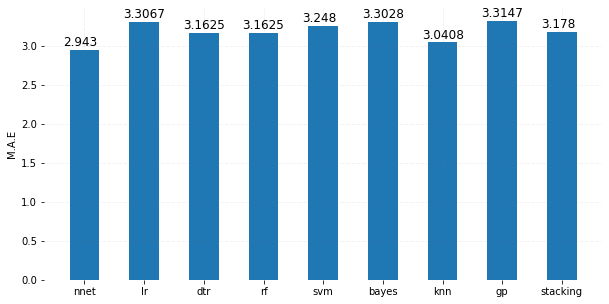

In [203]:
name = df_nosh['Name'].tolist()
score = df_nosh['MAE_test'].tolist()

# Figure Size 
fig, ax = plt.subplots(figsize = (10,5)) 
  
# Bar Plot 
ax.bar(name, score, 0.5)   

for i, v in enumerate(score):
    ax.text(i-0.35, v+0.05,round(score[i],4), fontsize=12)

# Remove the axes
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False)

# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2)

ax.set_ylabel('M.A.E')
  
# Show Plot 
plt.savefig('B2_G2.pdf')
#plt.show()

### Final test plots 

In [279]:
# Dataset as a dataframe.
df_nnet_nosh_4 = pd.read_csv('/Users/jarmireciomartinez/Workshop_AI/B2/G2/df_final_test_stacking.csv', sep=",")
df_nnet_nosh_4 = df_nnet_nosh_4[['y_test','y_pred','reg_error']]

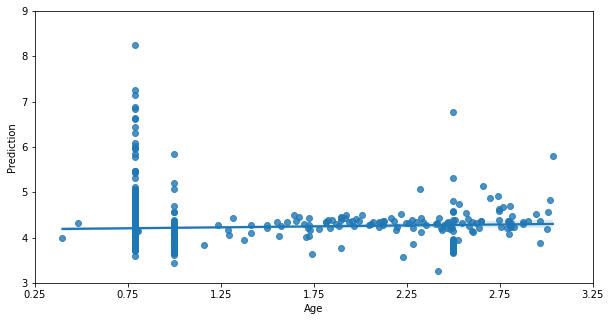

In [282]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (10,5))
sns.regplot(x="y_test", y="y_pred", data=df_nnet_nosh_4)

plt.yticks(np.arange(3, 10, 1))
plt.xticks(np.arange(0.25, 3.5, .5))
plt.xlabel("Age")
plt.ylabel("Prediction")

plt.savefig('B2_G2_stacking_1.pdf')

### Ages histogram (train and test, without shuffle)

In [283]:
# Train and test datasets as one dataframe.
df_data_nosh = pd.read_csv('/Users/jarmireciomartinez/Workshop_AI/B2/G2/df_data.csv', sep=",")
df_data_nosh = df_data_nosh[['X_train','y_train','X_test','y_test']]

/Users/jarmireciomartinez/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/jarmireciomartinez/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


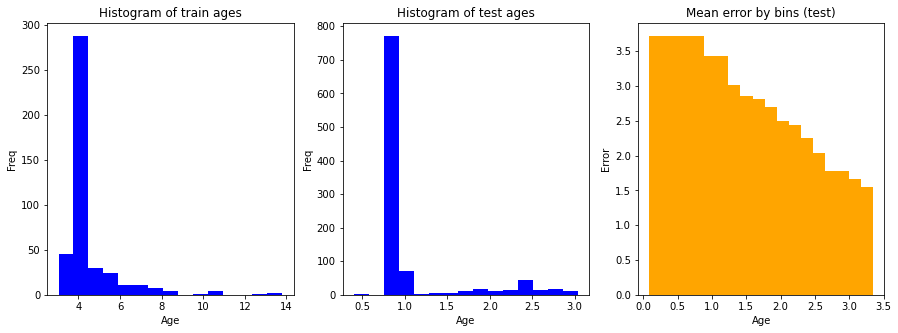

In [284]:
num_bins = 15

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))

n1, bins1, patches1 = ax1.hist(df_data_nosh['y_train'], num_bins, density=False, color='blue')
n2, bins2, patches2 = ax2.hist(df_data_nosh['y_test'], num_bins, density=False, color='blue')


# calculate mean error for each bin
aux = []
mean_error = []
for i in range(len(bins2)-1):
    if (i ==14):
        mean_err = (abs(df_nnet_nosh_4[(df_nnet_nosh_4['y_test'] >= bins2[i])
                                    & (df_nnet_nosh_4['y_test']<= bins2[i+1])].reg_error)).mean()
        mean_error.append(mean_err)
        aux_2 = (bins2[i]+bins2[i+1])/2
        aux.append(aux_2)
        
    else:
        mean_err = (abs(df_nnet_nosh_4[(df_nnet_nosh_4['y_test'] >= bins2[i])
                                    & (df_nnet_nosh_4['y_test']< bins2[i+1])].reg_error)).mean()
        mean_error.append(mean_err)
        aux_2 = (bins2[i]+bins2[i+1])/2
        aux.append(aux_2)

ax3.bar(aux,mean_error, color='orange')

ax1.set_title('Histogram of train ages')
ax2.set_title('Histogram of test ages')
ax3.set_title('Mean error by bins (test)')
ax1.set_xlabel('Age')
ax2.set_xlabel('Age')
ax3.set_xlabel('Age')
ax1.set_ylabel('Freq')
ax2.set_ylabel('Freq')
ax3.set_ylabel('Error')

plt.savefig('B2_G2_stacking_2.pdf')

In [285]:
# Next df shows the mean error for each bin

df_bins_error_no_sh = pd.DataFrame({'Bin': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
                            'Mean Error': mean_error})
df_bins_error_no_sh

,Bin,Mean Error
0,1,3.717003
1,2,NaN
2,3,3.432740
3,4,3.014484
4,5,2.856336
5,6,2.814005
6,7,2.693821
7,8,2.499577
8,9,2.434512
9,10,2.254163


# Benchmark 3



- Models score when the shuffle param in train_test_split is True.
    - Train set: 90% of the entire dataset
    - Test set: 100% of the new test set
- Age histogram to compare train and test datasets (with mean error by bin in the test set).

### Model Selection Results without shuffle

In [ ]:
# Dataset as a dataframe.
df_nosh = pd.read_csv('/Users/jarmireciomartinez/Workshop_AI/B2/G2/df_results.csv', sep=",")
df_nosh = df_nosh[['Name','MAE_test']]

In [ ]:
name = df_nosh['Name'].tolist()
score = df_nosh['MAE_test'].tolist()

# Figure Size 
fig, ax = plt.subplots(figsize = (10,5)) 
  
# Bar Plot 
ax.bar(name, score, 0.5)   

for i, v in enumerate(score):
    ax.text(i-0.35, v+0.05,round(score[i],4), fontsize=12)

# Remove the axes
for s in ['top', 'bottom', 'left', 'right']: 
    ax.spines[s].set_visible(False)

# Add x, y gridlines 
ax.grid(b = True, color ='grey', 
        linestyle ='-.', linewidth = 0.5, 
        alpha = 0.2)

ax.set_ylabel('M.A.E')
  
# Show Plot 
plt.savefig('B2_G1.pdf')
#plt.show()

### Final test plots 

In [ ]:
# Dataset as a dataframe.
df_nnet_nosh_4 = pd.read_csv('/Users/jarmireciomartinez/Workshop_AI/B2/G2/df_final_test_stacking.csv', sep=",")
df_nnet_nosh_4 = df_nnet_nosh_4[['y_test','y_pred','reg_error']]

In [ ]:
import seaborn as sns

fig, ax = plt.subplots(figsize = (10,5))
sns.regplot(x="y_test", y="y_pred", data=df_nnet_nosh_4)

plt.yticks(np.arange(3, 10, 1))
plt.xticks(np.arange(0.25, 3.5, .5))
plt.xlabel("Age")
plt.ylabel("Prediction")

plt.savefig('B2_G2_stacking_1.pdf')

### Ages histogram (train and test, without shuffle)

In [ ]:
# Train and test datasets as one dataframe.
df_data_nosh = pd.read_csv('/Users/jarmireciomartinez/Workshop_AI/B2/G2/df_data.csv', sep=",")
df_data_nosh = df_data_nosh[['X_train','y_train','X_test','y_test']]

In [ ]:
num_bins = 15

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,5))

n1, bins1, patches1 = ax1.hist(df_data_nosh['y_train'], num_bins, density=False, color='blue')
n2, bins2, patches2 = ax2.hist(df_data_nosh['y_test'], num_bins, density=False, color='blue')


# calculate mean error for each bin
aux = []
mean_error = []
for i in range(len(bins2)-1):
    if (i ==14):
        mean_err = (abs(df_nnet_nosh_4[(df_nnet_nosh_4['y_test'] >= bins2[i])
                                    & (df_nnet_nosh_4['y_test']<= bins2[i+1])].reg_error)).mean()
        mean_error.append(mean_err)
        aux_2 = (bins2[i]+bins2[i+1])/2
        aux.append(aux_2)
        
    else:
        mean_err = (abs(df_nnet_nosh_4[(df_nnet_nosh_4['y_test'] >= bins2[i])
                                    & (df_nnet_nosh_4['y_test']< bins2[i+1])].reg_error)).mean()
        mean_error.append(mean_err)
        aux_2 = (bins2[i]+bins2[i+1])/2
        aux.append(aux_2)

ax3.bar(aux,mean_error, color='orange')

ax1.set_title('Histogram of train ages')
ax2.set_title('Histogram of test ages')
ax3.set_title('Mean error by bins (test)')
ax1.set_xlabel('Age')
ax2.set_xlabel('Age')
ax3.set_xlabel('Age')
ax1.set_ylabel('Freq')
ax2.set_ylabel('Freq')
ax3.set_ylabel('Error')

plt.savefig('B2_G2_stacking_2.pdf')

In [ ]:
# Next df shows the mean error for each bin

df_bins_error_no_sh = pd.DataFrame({'Bin': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],
                            'Mean Error': mean_error})
df_bins_error_no_sh